In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [8]:
df.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df["Annual Income (k$)"].tail()

195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), dtype: int64

In [10]:
df["Gender"] = df.Genre.map({
    'Male': 0,
    'Female': 1
})
df = df.drop(columns="Genre")


In [11]:
df.Gender.unique()

array([0, 1])

In [12]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [13]:

df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']]

,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40
...,...,...,...
195,120,35,79
196,126,45,28
197,126,32,74
198,137,32,18


#### Стандартизация

In [14]:
scaled_features = StandardScaler().fit_transform(df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].values)
scaled_features

array([[-1.73899919, -1.42456879, -0.43480148],
       [-1.73899919, -1.28103541,  1.19570407],
       [-1.70082976, -1.3528021 , -1.71591298],
       [-1.70082976, -1.13750203,  1.04041783],
       [-1.66266033, -0.56336851, -0.39597992],
       [-1.66266033, -1.20926872,  1.00159627],
       [-1.62449091, -0.27630176, -1.71591298],
       [-1.62449091, -1.13750203,  1.70038436],
       [-1.58632148,  1.80493225, -1.83237767],
       [-1.58632148, -0.6351352 ,  0.84631002],
       [-1.58632148,  2.02023231, -1.4053405 ],
       [-1.58632148, -0.27630176,  1.89449216],
       [-1.54815205,  1.37433211, -1.36651894],
       [-1.54815205, -1.06573534,  1.04041783],
       [-1.54815205, -0.13276838, -1.44416206],
       [-1.54815205, -1.20926872,  1.11806095],
       [-1.50998262, -0.27630176, -0.59008772],
       [-1.50998262, -1.3528021 ,  0.61338066],
       [-1.43364376,  0.94373197, -0.82301709],
       [-1.43364376, -0.27630176,  1.8556706 ],
       [-1.39547433, -0.27630176, -0.590

In [15]:
scaled_df = pd.DataFrame(data=scaled_features, columns=['Annual Income (k$)', 'Age', 'Spending Score (1-100)'])
scaled_df

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980
...,...,...,...
195,2.268791,-0.276302,1.118061
196,2.497807,0.441365,-0.861839
197,2.497807,-0.491602,0.923953
198,2.917671,-0.491602,-1.250054


In [16]:
df = df[['CustomerID', 'Gender']].join(scaled_df)

In [17]:
df.head()

,CustomerID,Gender,Annual Income (k$),Age,Spending Score (1-100)
0,1,0,-1.738999,-1.424569,-0.434801
1,2,0,-1.738999,-1.281035,1.195704
2,3,1,-1.700830,-1.352802,-1.715913
3,4,1,-1.700830,-1.137502,1.040418
4,5,1,-1.662660,-0.563369,-0.395980


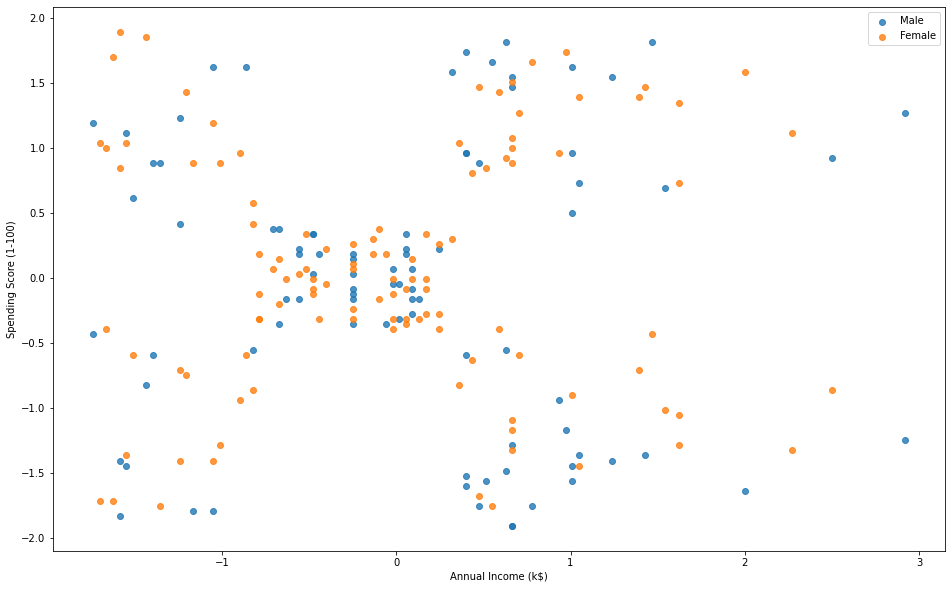

In [18]:
plt.figure(figsize = (16 , 10))
for gender in df.Gender.unique():
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df[df['Gender'] == gender], alpha=0.8, label=gender)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(labels=["Male", "Female"])
plt.show()


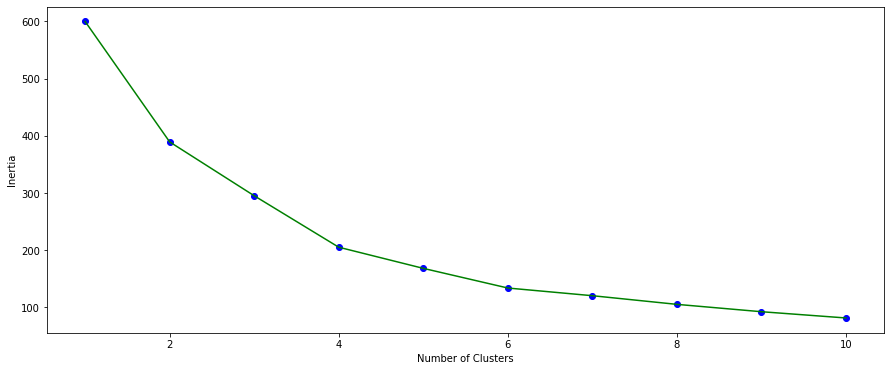

In [19]:
K = range(1, 11)
inertia = []
X1 = df.drop(columns=["CustomerID", "Gender"])

for k in K:
    kmeanModel = (KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=11))
    kmeanModel.fit(X1)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(K, inertia, 'bo')
plt.plot(K, inertia, 'g')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [20]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 11)
y_pred = kmeans.fit_predict(X1)
y_pred

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 2, 1, 1, 1, 1, 2, 3, 0, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

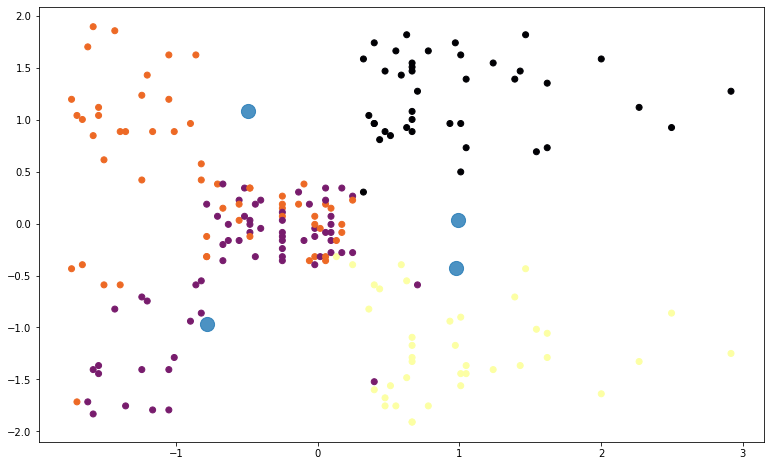

In [21]:
fig = plt.figure(figsize=(13, 8))
centers = kmeans.cluster_centers_
plt.scatter(X1["Annual Income (k$)"], X1["Spending Score (1-100)"], c=y_pred, cmap='inferno')
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.8);

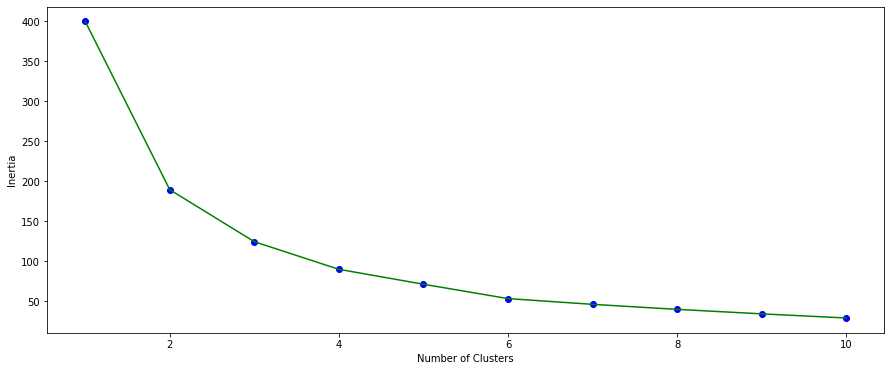

In [22]:
inertia = []
K = range(1, 11)
X2 = df[["Spending Score (1-100)", "Age"]]

for k in K:
    kmeanModel = (KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=11))
    kmeanModel.fit(X2)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(K, inertia, 'bo')
plt.plot(K, inertia, 'g')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
# Коэффицент зависит от числа кластеров
# нужен для изучения расстояния между кластерами
silhouette_score(X1, y_pred)

0.4039582785148566

In [24]:
# Оценка определяется как отношение между дисперсией внутри кластера и дисперсией между кластерами.
# может быть использован для оценки модели, где более высокое значение относится к модели
# с более четко определенными кластерами.
calinski_harabasz_score(X1, y_pred)

125.67639662405028

In [25]:
centers

array([[ 0.97484722, -0.42880597,  1.21608539],
       [-0.49056525,  1.08616125, -0.39717443],
       [-0.78476346, -0.96249203,  0.39202966],
       [ 0.99011499,  0.03720536, -1.18875705]])

In [26]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 11)
y_pred = kmeans.fit_predict(X2)
y_pred

array([4, 0, 3, 0, 4, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 4, 1, 0, 3, 0,
       1, 0, 1, 0, 2, 4, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 5, 0, 2, 4,
       1, 4, 2, 4, 4, 4, 2, 4, 4, 5, 2, 2, 2, 5, 4, 2, 5, 4, 5, 2, 5, 4,
       2, 5, 4, 4, 5, 2, 5, 5, 5, 4, 2, 2, 4, 2, 5, 2, 5, 2, 4, 2, 2, 4,
       4, 2, 5, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 5, 4, 2, 4, 5, 2, 5, 5,
       5, 4, 2, 4, 4, 4, 5, 2, 2, 2, 4, 2, 2, 0, 4, 0, 2, 0, 1, 0, 1, 0,
       4, 0, 3, 0, 1, 0, 3, 0, 1, 0, 4, 0, 3, 0, 2, 0, 3, 0, 3, 0, 1, 0,
       1, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 3, 0, 3, 4, 3, 0, 3, 0, 1, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1, 0, 2, 0,
       3, 0], dtype=int32)

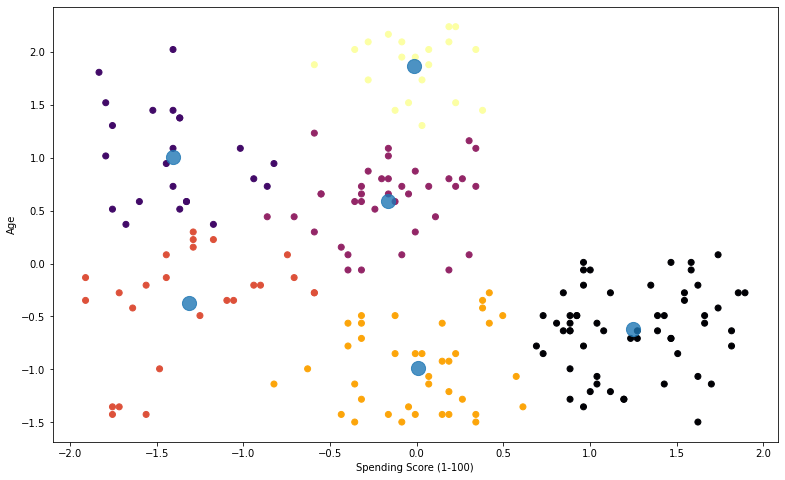

In [27]:
fig = plt.figure(figsize=(13, 8))
centers = kmeans.cluster_centers_
plt.scatter(X2["Spending Score (1-100)"], X2["Age"], c=y_pred, cmap='inferno')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.8);

In [28]:
silhouette_score(X2, y_pred)

0.4566283030197353

In [29]:
calinski_harabasz_score(X2, y_pred)

253.3222697328047